In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 9

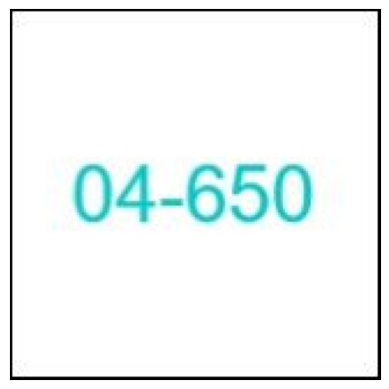

In [2]:
# loading and displaying image
img = plt.imread("04650.jpg")
img = np.array(img, dtype=np.uint8)
plt.imshow(img)
plt.yticks([]); plt.xticks([]);

In [ ]:

def transform_image(image, A):
    # extract each pixel position as a vector relative to the center
    # and store the corresponding color
    height, width, c = img.shape
    vectors =  []
    colors = []
    for j in range(height):
        for i in range(width):
            # TODO append the color from the image
            # you can use .append
            colors.append(j, i)

            # TODO append the centered pixel position
            vectors.append([i-width/2, j-height/2])
            


    # apply your transformation matrix, A, to the pixel positions
    # TODO
    transformed_vectors = None
    


    # place the colors of the transformed vectors in the correct position in the image
    transformed_img = np.ones_like(img)*255 # an all white image
    for k, (i,j) in enumerate(zip(*transformed_vectors)):
        # TODO 

    # display the transformed image
    plt.imshow(transformed_img, cmap="gray")
    plt.xticks([]); plt.yticks([]);



In [ ]:
# (a) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = None # TODO
transform_image(img, A)

In [ ]:
# (b) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = None # TODO
transform_image(img, A)

In [ ]:
# (c) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = None # TODO
transform_image(img, A)

In [ ]:
# (d) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = None # TODO
transform_image(img, A)

In [ ]:
# (e) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = None # TODO
transform_image(img, A)

# Question 10

In [ ]:
img = plt.imread("04650_1.jpg")[:,:,0] # read as grayscale
img = np.array(img, dtype=np.uint8)

A = (img > 100)*1 # make values to be in {0,1}

plt.imshow(A, cmap="gray")
plt.yticks([]); plt.xticks([]);

In [ ]:
height, width = A.shape
B = None
C = None

# obtain C, containing linear independent rows of A
# TODO


# obtain B, containing coefficients used to linearly combine the rows of C
# to obtain the rows of A
# TODO


In [ ]:
# display the result
plt.imshow(B.dot(C), cmap="gray")
plt.yticks([]); plt.xticks([]);